## TASK 1

## Load the libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import plotly.express as px

### Read the dataset

In [12]:
transaction_data= pd.read_excel('QVI_transaction_data.xlsx')

In [14]:
customer_data= pd.read_csv('QVI_purchase_behaviour.csv')

In [16]:
transaction_data.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [18]:
customer_data.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
transaction_data.shape[0]

264836

### Check null values

In [7]:
transaction_data.isnull().sum()  

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

### Check outliers

<Axes: >

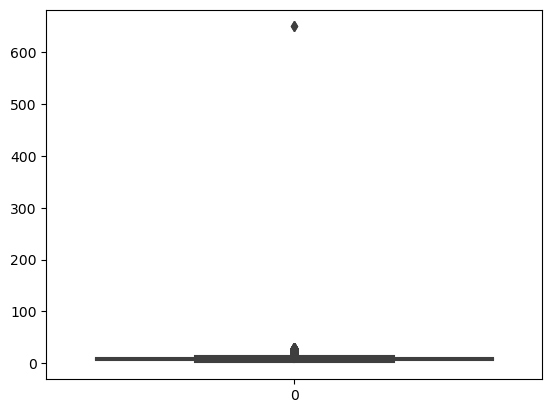

In [8]:
sns.boxplot(transaction_data.TOT_SALES)

### Remove non numeric data

In [9]:
numericdata=transaction_data.select_dtypes(['float','int']) 

In [10]:
numericdata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


In [11]:
x = numericdata[numericdata['TOT_SALES'] < 8.000]

### Remove outliers

<Axes: >

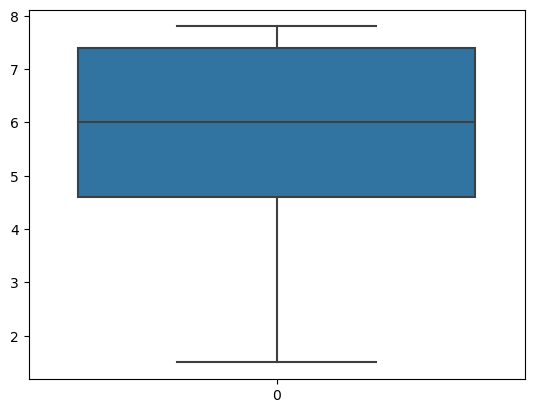

In [12]:
sns.boxplot(x.TOT_SALES)  


C:\Users\Dell\AppData\Local\Temp\ipykernel_5384\1508472166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.TOT_SALES, kde=True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

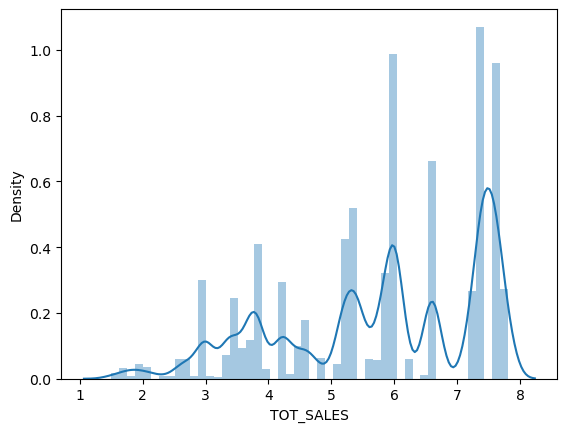

In [13]:
#Remove outlier using distplot
sns.distplot(x.TOT_SALES, kde=True)


### Check datatypes(DataFormat)

In [14]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [15]:
# Convert the date column to date format
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"])

In [16]:
transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [17]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [18]:
# Print the first few rows of the 'PROD_NAME' column
print(transaction_data['PROD_NAME'].head(10))

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt & Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream&Chives 210G
Name: PROD_NAME, dtype: object


In [19]:
# Generate a summary of the PROD_NAME column
summary = transaction_data['PROD_NAME'].describe()
print(summary)

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object


In [20]:
import re

In [21]:
# Extract words from PROD_NAME column
productWords = transaction_data['PROD_NAME'].str.split(expand=True).stack().reset_index(drop=True)
productWords = productWords.apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation
productWords = pd.DataFrame(productWords, columns=['words'])

In [22]:
# Remove digits and special characters
productWords = productWords[~productWords['words'].str.contains(r'\d')]  # Remove digits
productWords = productWords[~productWords['words'].str.contains(r'[^a-zA-Z\s]')]  # Remove special characters

# Count the frequency of each word and sort by frequency
word_counts = productWords['words'].value_counts().reset_index()
word_counts.columns = ['Word', 'Frequency']
word_counts = word_counts.sort_values(by='Frequency', ascending=False)
print(word_counts)

         Word  Frequency
0       Chips      49770
1      Kettle      41288
2                  35565
3      Smiths      28860
4        Salt      27976
..        ...        ...
183  Sunbites       1432
184        Pc       1431
185    Garden       1419
186       NCC       1419
187     Fries       1418

[188 rows x 2 columns]


In [23]:
# Remove salsa products
#transaction_data['SALSA'] = transaction_data['PROD_NAME'].str.lower().str.contains('salsa')
#transaction_data = transaction_data[~transaction_data['SALSA'], :]
#transaction_data = transaction_data.drop(columns=['SALSA'])

# Remove salsa products
transaction_data['SALSA'] = transaction_data['PROD_NAME'].str.contains('salsa', case=False)
transaction_data = transaction_data[~transaction_data['SALSA']]
transaction_data = transaction_data.drop('SALSA', axis=1)

# Generate summary statistics
summary = transaction_data.describe(include='all')
print(summary)

                                 DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                          246742  246742.000000    2.467420e+05   
unique                            NaN            NaN             NaN   
top                               NaN            NaN             NaN   
freq                              NaN            NaN             NaN   
mean    1970-01-01 00:00:00.000043464     135.051098    1.355310e+05   
min     1970-01-01 00:00:00.000043282       1.000000    1.000000e+03   
25%     1970-01-01 00:00:00.000043373      70.000000    7.001500e+04   
50%     1970-01-01 00:00:00.000043464     130.000000    1.303670e+05   
75%     1970-01-01 00:00:00.000043555     203.000000    2.030840e+05   
max     1970-01-01 00:00:00.000043646     272.000000    2.373711e+06   
std                               NaN      76.787096    8.071528e+04   

              TXN_ID       PROD_NBR                               PROD_NAME  \
count   2.467420e+05  246742.000000                     

In [24]:
# Filter the dataset to find the outlier
outlier_transaction = transaction_data[transaction_data['PROD_QTY'] == 200]
print(outlier_transaction)

                               DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
69762 1970-01-01 00:00:00.000043331        226          226000  226201   
69763 1970-01-01 00:00:00.000043605        226          226000  226210   

       PROD_NBR                         PROD_NAME  PROD_QTY  TOT_SALES  
69762         4  Dorito Corn Chp     Supreme 380g       200      650.0  
69763         4  Dorito Corn Chp     Supreme 380g       200      650.0  


In [25]:
# Filter the dataset to see other transactions by the same customer
customer_transactions = transaction_data[transaction_data['LYLTY_CARD_NBR'] == outlier_transaction.iloc[0]['LYLTY_CARD_NBR']]
print(customer_transactions)

                               DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
69762 1970-01-01 00:00:00.000043331        226          226000  226201   
69763 1970-01-01 00:00:00.000043605        226          226000  226210   

       PROD_NBR                         PROD_NAME  PROD_QTY  TOT_SALES  
69762         4  Dorito Corn Chp     Supreme 380g       200      650.0  
69763         4  Dorito Corn Chp     Supreme 380g       200      650.0  


In [26]:
# Filter out the customer based on the loyalty card number
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != outlier_transaction.iloc[0]['LYLTY_CARD_NBR']]

# Re-examine transaction data
summary = transaction_data.describe(include='all')
print(summary)

                                 DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                          246740  246740.000000    2.467400e+05   
unique                            NaN            NaN             NaN   
top                               NaN            NaN             NaN   
freq                              NaN            NaN             NaN   
mean    1970-01-01 00:00:00.000043464     135.050361    1.355303e+05   
min     1970-01-01 00:00:00.000043282       1.000000    1.000000e+03   
25%     1970-01-01 00:00:00.000043373      70.000000    7.001500e+04   
50%     1970-01-01 00:00:00.000043464     130.000000    1.303670e+05   
75%     1970-01-01 00:00:00.000043555     203.000000    2.030832e+05   
max     1970-01-01 00:00:00.000043646     272.000000    2.373711e+06   
std                               NaN      76.786971    8.071520e+04   

              TXN_ID       PROD_NBR                               PROD_NAME  \
count   2.467400e+05  246740.000000                     

In [27]:
# Convert DATE column to datetime if it's not already
#transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'])

# Count transactions by date
countByDate = transaction_data.groupby('DATE').size().reset_index(name='COUNT')

# Print summary
print(countByDate)
print("Number of rows:", len(countByDate))
print(countByDate.describe())


                             DATE  COUNT
0   1970-01-01 00:00:00.000043282    663
1   1970-01-01 00:00:00.000043283    650
2   1970-01-01 00:00:00.000043284    674
3   1970-01-01 00:00:00.000043285    669
4   1970-01-01 00:00:00.000043286    660
..                            ...    ...
359 1970-01-01 00:00:00.000043642    657
360 1970-01-01 00:00:00.000043643    669
361 1970-01-01 00:00:00.000043644    673
362 1970-01-01 00:00:00.000043645    703
363 1970-01-01 00:00:00.000043646    704

[364 rows x 2 columns]
Number of rows: 364
                                DATE       COUNT
count                            364  364.000000
mean   1970-01-01 00:00:00.000043464  677.857143
min    1970-01-01 00:00:00.000043282  607.000000
25%    1970-01-01 00:00:00.000043372  658.000000
50%    1970-01-01 00:00:00.000043464  674.000000
75%    1970-01-01 00:00:00.000043555  694.250000
max    1970-01-01 00:00:00.000043646  865.000000
std                              NaN   33.687536


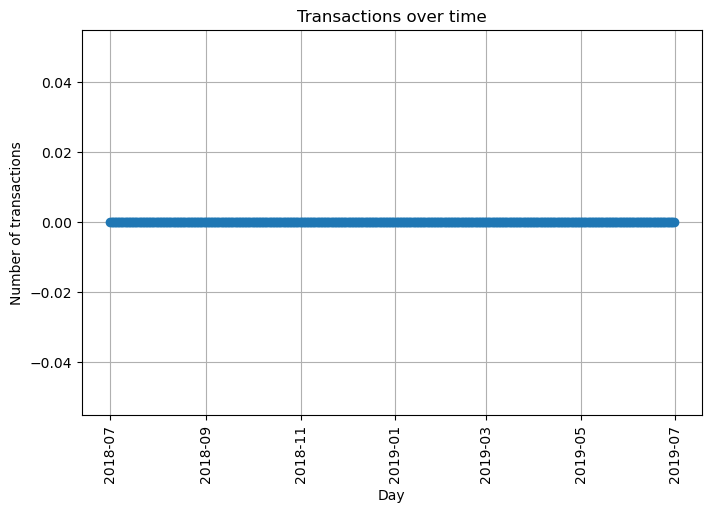

In [39]:
# Create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
full_dates = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')})

# Convert DATE columns to datetime format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'])

# Count the number of transactions by date
transactions_by_day = transaction_data.groupby('DATE').size().reset_index(name='COUNT')

# Merge the full dates with the transactions data
transactions_full = full_dates.merge(transactions_by_day, on='DATE', how='left')
transactions_full['COUNT'].fillna(0, inplace=True)  # Replace NA values with 0

# Plot transactions over time
plt.figure(figsize=(8, 5))
plt.plot(transactions_full['DATE'], transactions_full['COUNT'], linestyle='-', marker='o')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [37]:
print(transactions_full)

          DATE  COUNT
0   2018-07-01    0.0
1   2018-07-02    0.0
2   2018-07-03    0.0
3   2018-07-04    0.0
4   2018-07-05    0.0
..         ...    ...
360 2019-06-26    0.0
361 2019-06-27    0.0
362 2019-06-28    0.0
363 2019-06-29    0.0
364 2019-06-30    0.0

[365 rows x 2 columns]


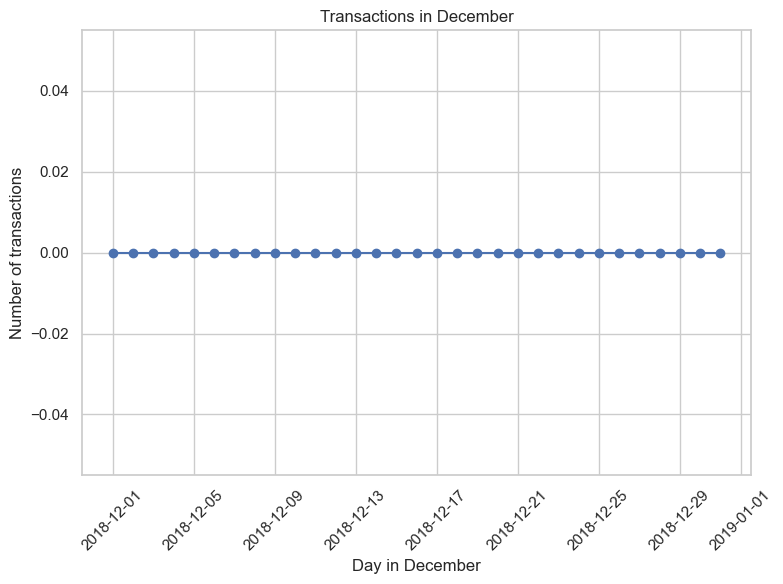

In [41]:
decemberdata=transactions_full[transactions_full['DATE'].dt.month==12]

# Plot transactions over time for December
plt.figure(figsize=(8, 6))
plt.plot(decemberdata['DATE'], decemberdata['COUNT'], marker='o', linestyle='-')
plt.xlabel('Day in December')
plt.ylabel('Number of transactions')
plt.title('Transactions in December')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Nexttttttttttttt




In [42]:
import re

#df = pd.DataFrame(transaction_data)
# Function to extract pack size using regular expression
def extract_pack_size(text):
    pack_size = re.findall(r'\d+g', text)  # Matches sequences of digits followed by 'g'
    if pack_size:
        return int(pack_size[0].strip('g'))  # Extract the first match and convert to integer
    else:
        return None  # Return None if no pack size found

# Apply the function to extract pack size from PROD_NAME and create PACK_SIZE column
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(extract_pack_size)

# Display the updated DataFrame with PACK_SIZE column
print(transaction_data)

                                DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
0      1970-01-01 00:00:00.000043390          1            1000       1   
1      1970-01-01 00:00:00.000043599          1            1307     348   
2      1970-01-01 00:00:00.000043605          1            1343     383   
3      1970-01-01 00:00:00.000043329          2            2373     974   
4      1970-01-01 00:00:00.000043330          2            2426    1038   
...                              ...        ...             ...     ...   
264831 1970-01-01 00:00:00.000043533        272          272319  270088   
264832 1970-01-01 00:00:00.000043325        272          272358  270154   
264833 1970-01-01 00:00:00.000043410        272          272379  270187   
264834 1970-01-01 00:00:00.000043461        272          272379  270188   
264835 1970-01-01 00:00:00.000043365        272          272380  270189   

        PROD_NBR                                 PROD_NAME  PROD_QTY  \
0              5    Natural

In [43]:
transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0
6,1970-01-01 00:00:00.000043601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0
7,1970-01-01 00:00:00.000043601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210.0
8,1970-01-01 00:00:00.000043332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150.0
9,1970-01-01 00:00:00.000043330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,NaN
10,1970-01-01 00:00:00.000043602,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0


In [44]:
# Count occurrences of each pack size and sort by PACK_SIZE
pack_size_counts = transaction_data['PACK_SIZE'].value_counts().reset_index().rename(columns={'index': 'PACK_SIZE', 'PACK_SIZE': 'P_S'})
pack_size_counts = pack_size_counts.sort_values(by='P_S')

# Display pack size counts
print(pack_size_counts)

      P_S  count
17   70.0   1507
13   90.0   3008
3   110.0  22387
19  125.0   1454
2   134.0  25102
10  135.0   3257
1   150.0  38705
15  160.0   2970
5   165.0  15297
4   170.0  19983
0   175.0  64929
18  180.0   1468
14  190.0   2995
9   200.0   4473
12  210.0   3167
16  220.0   1564
11  250.0   3169
8   270.0   6285
6   330.0  12540
7   380.0   6416


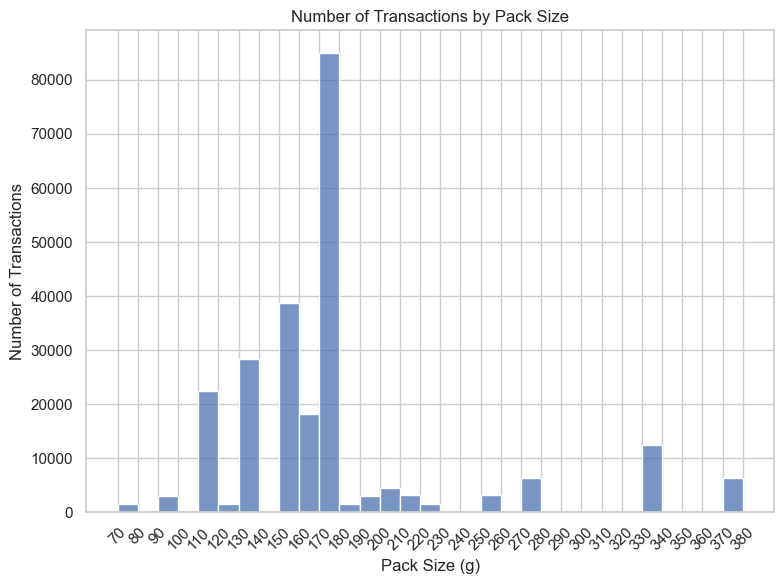

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plot style
sns.set(style="whitegrid")

# Create a histogram of PACK_SIZE
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data['PACK_SIZE'], bins=range(70, 390, 10), kde=False)
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size')
plt.xticks(range(70, 390, 10), rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# Function to extract brand name
def extract_brand_name(text):
    return text.split()[0]  # Split the text by spaces and return the first word

# Apply the function to extract brand name from PROD_NAME and create BRAND column
transaction_data['BRAND'] = transaction_data['PROD_NAME'].apply(extract_brand_name)

# Check if the column was added correctly
print(transaction_data)

                                DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
0      1970-01-01 00:00:00.000043390          1            1000       1   
1      1970-01-01 00:00:00.000043599          1            1307     348   
2      1970-01-01 00:00:00.000043605          1            1343     383   
3      1970-01-01 00:00:00.000043329          2            2373     974   
4      1970-01-01 00:00:00.000043330          2            2426    1038   
...                              ...        ...             ...     ...   
264831 1970-01-01 00:00:00.000043533        272          272319  270088   
264832 1970-01-01 00:00:00.000043325        272          272358  270154   
264833 1970-01-01 00:00:00.000043410        272          272379  270187   
264834 1970-01-01 00:00:00.000043461        272          272379  270188   
264835 1970-01-01 00:00:00.000043365        272          272380  270189   

        PROD_NBR                                 PROD_NAME  PROD_QTY  \
0              5    Natural

In [47]:
# Display unique brands
unique_brands = transaction_data['BRAND'].unique()
print("Unique Brands:", unique_brands)

# Display counts of each brand to check distribution
brand_counts = transaction_data['BRAND'].value_counts()
print("Brand Counts:\n", brand_counts)

Unique Brands: ['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']
Brand Counts:
 BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64


In [48]:
# Clean brand names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'RED': 'RRD'})

# Additional brand adjustments
# Add any additional mappings as required
brand_replacements = {
    'RED': 'RRD',  # Red Rock Deli
    'CCs': 'CC',   # Example adjustment
    'Smiths': 'Smith',  # Example adjustment
    # Add more replacements as needed
}

transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_replacements)

# Check if the brand names look reasonable
print(transaction_data)

# Display counts of each brand to check distribution
brand_counts = transaction_data['BRAND'].value_counts()
print("Brand Counts:\n", brand_counts)

                                DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
0      1970-01-01 00:00:00.000043390          1            1000       1   
1      1970-01-01 00:00:00.000043599          1            1307     348   
2      1970-01-01 00:00:00.000043605          1            1343     383   
3      1970-01-01 00:00:00.000043329          2            2373     974   
4      1970-01-01 00:00:00.000043330          2            2426    1038   
...                              ...        ...             ...     ...   
264831 1970-01-01 00:00:00.000043533        272          272319  270088   
264832 1970-01-01 00:00:00.000043325        272          272358  270154   
264833 1970-01-01 00:00:00.000043410        272          272379  270187   
264834 1970-01-01 00:00:00.000043461        272          272379  270188   
264835 1970-01-01 00:00:00.000043365        272          272380  270189   

        PROD_NBR                                 PROD_NAME  PROD_QTY  \
0              5    Natural

## Examine Customer data

In [49]:
customer_data.head(10)

# Display the first few rows of the customer dataset
#print(customer_data.head())

# Get basic summaries
#print(customer_data.describe(include='all'))


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [50]:
#Distribution of LYLTY_CARD_NBR
print("LYLTY_CARD_NBR Distribution:\n", customer_data['LYLTY_CARD_NBR'].value_counts())

# Distribution of LIFESTAGE
print("LIFESTAGE Distribution:\n", customer_data['LIFESTAGE'].value_counts())

# Distribution of PREMIUM_CUSTOMER
print("PREMIUM_CUSTOMER Distribution:\n", customer_data['PREMIUM_CUSTOMER'].value_counts())


LYLTY_CARD_NBR Distribution:
 LYLTY_CARD_NBR
1000       1
181211     1
181217     1
181216     1
181215     1
          ..
88126      1
88127      1
88128      1
88129      1
2373711    1
Name: count, Length: 72637, dtype: int64
LIFESTAGE Distribution:
 LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64
PREMIUM_CUSTOMER Distribution:
 PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


In [51]:
transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CC
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smith
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smith
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
6,1970-01-01 00:00:00.000043601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smith
7,1970-01-01 00:00:00.000043601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210.0,Grain
8,1970-01-01 00:00:00.000043332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150.0,Doritos
9,1970-01-01 00:00:00.000043330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,NaN,Grain
10,1970-01-01 00:00:00.000043602,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smith


In [52]:
customer_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [53]:
# Merge transaction data with customer data using a left join
merged_d = pd.merge(transaction_data, customer_data, how='left', on='LYLTY_CARD_NBR')

# Check if the merge was successful
print(merged_d.head())

# Ensure the number of rows in merged_data is the same as in transaction_data
print("Number of rows in transaction_data:", len(transaction_data))
print("Number of rows in merged_data:", len(merged_d))

                           DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1970-01-01 00:00:00.000043390          1            1000       1         5   
1 1970-01-01 00:00:00.000043599          1            1307     348        66   
2 1970-01-01 00:00:00.000043605          1            1343     383        61   
3 1970-01-01 00:00:00.000043329          2            2373     974        69   
4 1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND               LIFESTAGE PREMIUM_C

In [54]:
# Check for missing customer details
missing_customers = merged_d[merged_d.isnull().any(axis=1)]
print("Transactions with missing customer details:\n", missing_customers)

Transactions with missing customer details:
                                 DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
8      1970-01-01 00:00:00.000043330          7            7150    6900   
31     1970-01-01 00:00:00.000043328         51           51100   46802   
32     1970-01-01 00:00:00.000043331         51           51100   46803   
197    1970-01-01 00:00:00.000043537          1            1348     391   
271    1970-01-01 00:00:00.000043345          5            5018    4465   
...                              ...        ...             ...     ...   
246492 1970-01-01 00:00:00.000043548        261          261035  259859   
246549 1970-01-01 00:00:00.000043466        264          264268  263026   
246612 1970-01-01 00:00:00.000043641        266          266088  263925   
246639 1970-01-01 00:00:00.000043596        266          266432  264264   
246650 1970-01-01 00:00:00.000043284        268          268200  264615   

        PROD_NBR                                 PROD_

In [55]:
customer_data.isnull().sum()  

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [56]:
merged_d.isnull().sum() 

DATE                   0
STORE_NBR              0
LYLTY_CARD_NBR         0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
PACK_SIZE           6064
BRAND                  0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
dtype: int64

In [57]:

# Define the file path where you want to save the CSV
file_path = "QVI_task1.csv"  # Change this to your desired file path

# Save the DataFrame to a CSV file
merged_d.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to QVI_task1.csv


In [58]:

# 1. Who spends the most on chips
total_sales_by_customer = merged_d.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
total_sales_by_customer = total_sales_by_customer.merge(merged_d[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates(), on='LYLTY_CARD_NBR')
top_spenders = total_sales_by_customer.sort_values(by='TOT_SALES', ascending=False)
print("Top Spenders on Chips:\n", top_spenders)



Top Spenders on Chips:
        LYLTY_CARD_NBR  TOT_SALES              LIFESTAGE PREMIUM_CUSTOMER
59820          230078      138.6         OLDER FAMILIES           Budget
15646           58361      124.8         YOUNG FAMILIES           Budget
16928           63197      122.6         OLDER FAMILIES           Budget
42037          162039      121.6         OLDER FAMILIES       Mainstream
47076          179228      120.8         YOUNG FAMILIES           Budget
...               ...        ...                    ...              ...
20089           74339        1.7  OLDER SINGLES/COUPLES           Budget
31863          120143        1.7  YOUNG SINGLES/COUPLES           Budget
4645            18102        1.7  YOUNG SINGLES/COUPLES       Mainstream
20085           74329        1.7  OLDER SINGLES/COUPLES       Mainstream
13371           50201        1.7               RETIREES          Premium

[71287 rows x 4 columns]


In [59]:
# 2. How many customers are in each segment
customers_per_segment = merged_d[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates().groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Customer_Count')
print("Number of Customers in Each Segment:\n", customers_per_segment)



Number of Customers in Each Segment:
                  LIFESTAGE PREMIUM_CUSTOMER  Customer_Count
0   MIDAGE SINGLES/COUPLES           Budget            1474
1   MIDAGE SINGLES/COUPLES       Mainstream            3298
2   MIDAGE SINGLES/COUPLES          Premium            2369
3             NEW FAMILIES           Budget            1087
4             NEW FAMILIES       Mainstream             830
5             NEW FAMILIES          Premium             575
6           OLDER FAMILIES           Budget            4611
7           OLDER FAMILIES       Mainstream            2788
8           OLDER FAMILIES          Premium            2231
9    OLDER SINGLES/COUPLES           Budget            4849
10   OLDER SINGLES/COUPLES       Mainstream            4858
11   OLDER SINGLES/COUPLES          Premium            4682
12                RETIREES           Budget            4385
13                RETIREES       Mainstream            6358
14                RETIREES          Premium            3812
15

In [60]:
# 3. How many chips are bought per customer by segment
chips_bought_per_customer = merged_d.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Chips_Bought')
chips_bought_per_segment = chips_bought_per_customer.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['Chips_Bought'].sum().reset_index()
print("Chips Bought per Customer by Segment:\n", chips_bought_per_segment)



Chips Bought per Customer by Segment:
                  LIFESTAGE PREMIUM_CUSTOMER  Chips_Bought
0   MIDAGE SINGLES/COUPLES           Budget          4691
1   MIDAGE SINGLES/COUPLES       Mainstream         11095
2   MIDAGE SINGLES/COUPLES          Premium          7612
3             NEW FAMILIES           Budget          2824
4             NEW FAMILIES       Mainstream          2185
5             NEW FAMILIES          Premium          1488
6           OLDER FAMILIES           Budget         21514
7           OLDER FAMILIES       Mainstream         13241
8           OLDER FAMILIES          Premium         10403
9    OLDER SINGLES/COUPLES           Budget         17172
10   OLDER SINGLES/COUPLES       Mainstream         17061
11   OLDER SINGLES/COUPLES          Premium         16560
12                RETIREES           Budget         14225
13                RETIREES       Mainstream         19970
14                RETIREES          Premium         12236
15          YOUNG FAMILIES       

In [61]:
# 4. What's the average chip price by customer segment
average_price_per_segment = merged_d.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index(name='Average_Price')
print("Average Chip Price by Customer Segment:\n", average_price_per_segment)

Average Chip Price by Customer Segment:
                  LIFESTAGE PREMIUM_CUSTOMER  Average_Price
0   MIDAGE SINGLES/COUPLES           Budget       7.108442
1   MIDAGE SINGLES/COUPLES       Mainstream       7.637156
2   MIDAGE SINGLES/COUPLES          Premium       7.152371
3             NEW FAMILIES           Budget       7.297256
4             NEW FAMILIES       Mainstream       7.313364
5             NEW FAMILIES          Premium       7.231720
6           OLDER FAMILIES           Budget       7.291241
7           OLDER FAMILIES       Mainstream       7.281440
8           OLDER FAMILIES          Premium       7.232779
9    OLDER SINGLES/COUPLES           Budget       7.444305
10   OLDER SINGLES/COUPLES       Mainstream       7.306049
11   OLDER SINGLES/COUPLES          Premium       7.459997
12                RETIREES           Budget       7.445786
13                RETIREES       Mainstream       7.269352
14                RETIREES          Premium       7.461315
15          YOU

In [62]:
# Calculate total spend per customer
total_spend_per_customer = transaction_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index(name='Total_Spend')

# Calculate total spend on chips per customer
chips_spend_per_customer = transaction_data[transaction_data['PROD_NAME'] == 'Chips'].groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index(name='Chips_Spend')

# Merge total spend and chips spend data
customer_spend_data = pd.merge(total_spend_per_customer, chips_spend_per_customer, on='LYLTY_CARD_NBR', how='left').fillna(0)

# Calculate proportion of spend on chips
customer_spend_data['Chips_Spend_Proportion'] = customer_spend_data['Chips_Spend'] / customer_spend_data['Total_Spend']

# Merge with customer segment information
customer_segment_data = customer_data[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()
customer_spend_data = pd.merge(customer_spend_data, customer_segment_data, on='LYLTY_CARD_NBR', how='left')

print("Customer Spend Data:\n", customer_spend_data)


Customer Spend Data:
        LYLTY_CARD_NBR  Total_Spend  Chips_Spend  Chips_Spend_Proportion  \
0                1000          6.0          0.0                     0.0   
1                1002          2.7          0.0                     0.0   
2                1003          6.6          0.0                     0.0   
3                1004          1.9          0.0                     0.0   
4                1005          2.8          0.0                     0.0   
...               ...          ...          ...                     ...   
71282         2370651         13.0          0.0                     0.0   
71283         2370701          7.2          0.0                     0.0   
71284         2370751          9.2          0.0                     0.0   
71285         2370961          8.4          0.0                     0.0   
71286         2373711         11.4          0.0                     0.0   

                    LIFESTAGE PREMIUM_CUSTOMER  
0       YOUNG SINGLES/COUPLE

In [63]:
# Calculate the proportion of customers in each segment overall
overall_customer_segments = customer_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Customer_Count')
overall_customer_segments['Proportion'] = overall_customer_segments['Customer_Count'] / overall_customer_segments['Customer_Count'].sum()

print("Overall Customer Segments:\n", overall_customer_segments)

Overall Customer Segments:
                  LIFESTAGE PREMIUM_CUSTOMER  Customer_Count  Proportion
0   MIDAGE SINGLES/COUPLES           Budget            1504    0.020706
1   MIDAGE SINGLES/COUPLES       Mainstream            3340    0.045982
2   MIDAGE SINGLES/COUPLES          Premium            2431    0.033468
3             NEW FAMILIES           Budget            1112    0.015309
4             NEW FAMILIES       Mainstream             849    0.011688
5             NEW FAMILIES          Premium             588    0.008095
6           OLDER FAMILIES           Budget            4675    0.064361
7           OLDER FAMILIES       Mainstream            2831    0.038975
8           OLDER FAMILIES          Premium            2274    0.031306
9    OLDER SINGLES/COUPLES           Budget            4929    0.067858
10   OLDER SINGLES/COUPLES       Mainstream            4930    0.067872
11   OLDER SINGLES/COUPLES          Premium            4750    0.065394
12                RETIREES          

In [64]:
# Calculate the proportion of customers who purchase chips in each segment
chips_customers = merged_d[merged_d['PROD_NAME'] == 'Chips'][['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()
chips_customer_segments = chips_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Customer_Count')
chips_customer_segments['Proportion'] = chips_customer_segments['Customer_Count'] / chips_customer_segments['Customer_Count'].sum()


In [65]:
# Output the final dataframes
print("Customer Spend Data:\n", customer_spend_data)
print("Overall Customer Segments:\n", overall_customer_segments)
print("Chips Customer Segments:\n", chips_customer_segments)

Customer Spend Data:
        LYLTY_CARD_NBR  Total_Spend  Chips_Spend  Chips_Spend_Proportion  \
0                1000          6.0          0.0                     0.0   
1                1002          2.7          0.0                     0.0   
2                1003          6.6          0.0                     0.0   
3                1004          1.9          0.0                     0.0   
4                1005          2.8          0.0                     0.0   
...               ...          ...          ...                     ...   
71282         2370651         13.0          0.0                     0.0   
71283         2370701          7.2          0.0                     0.0   
71284         2370751          9.2          0.0                     0.0   
71285         2370961          8.4          0.0                     0.0   
71286         2373711         11.4          0.0                     0.0   

                    LIFESTAGE PREMIUM_CUSTOMER  
0       YOUNG SINGLES/COUPLE

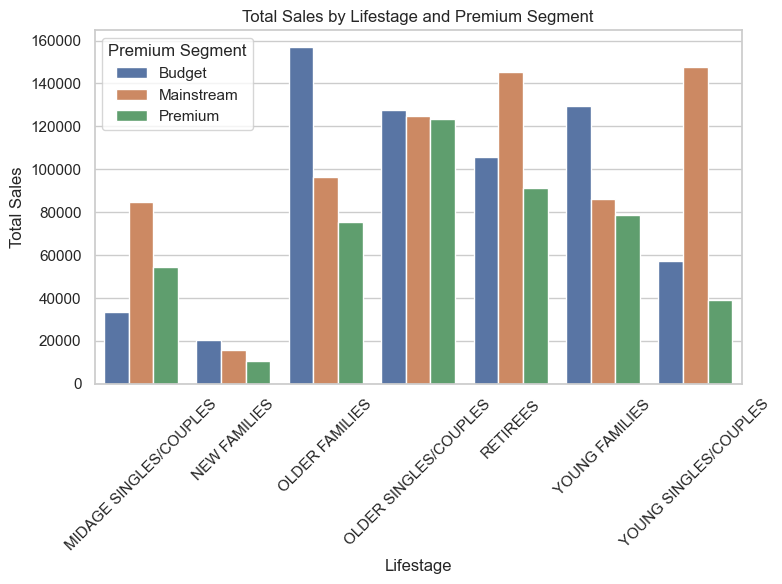

In [66]:
# Merge transaction data with customer data
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()


# Plot the total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(8, 6))
sns.barplot(data=total_sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Lifestage and Premium Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Premium Segment')
plt.tight_layout()
plt.show()

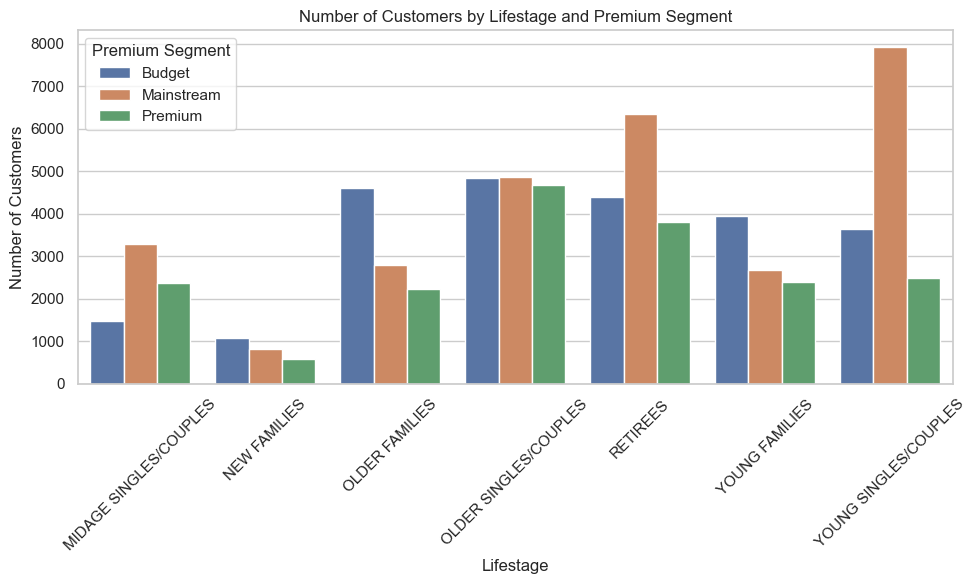

In [67]:
# Remove duplicate customer entries
unique_customers = data[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()

# Calculate number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_count_by_segment = unique_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Customer_Count')

# Plot the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_count_by_segment, x='LIFESTAGE', y='Customer_Count', hue='PREMIUM_CUSTOMER')
plt.title('Number of Customers by Lifestage and Premium Segment')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Segment')
plt.tight_layout()
plt.show()

In [68]:
# Grouping by LIFESTAGE and PREMIUM_CUSTOMER and calculating average units per customer
total_sales_1 = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
units = total_sales_1.agg(units_count=('PROD_QTY', 'sum'), unique_customers=('LYLTY_CARD_NBR', 'nunique'))
units['avg_units_per_customer'] = units['units_count'] / units['unique_customers']
units = units.reset_index()

# Summary of the units DataFrame
print(units.describe())



        units_count  unique_customers  avg_units_per_customer
count     21.000000         21.000000               21.000000
mean   22399.952381       3394.619048                6.574805
std    11707.967221       1827.781592                1.708474
min     2769.000000        575.000000                4.250069
25%    14400.000000       2369.000000                4.891566
50%    23194.000000       3298.000000                6.141847
75%    32607.000000       4611.000000                8.638361
max    41853.000000       7917.000000                9.255380


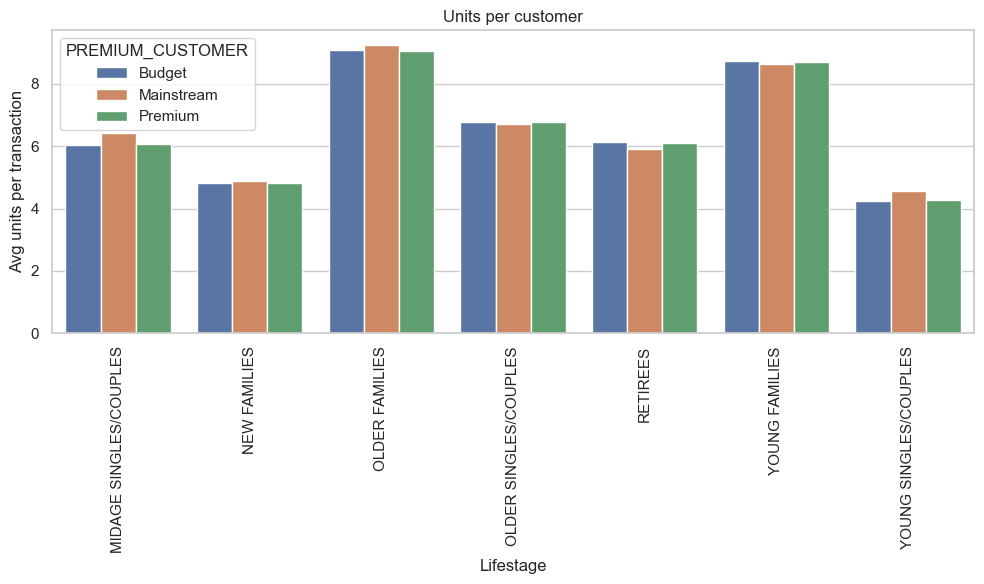

In [69]:

# Plotting the average units per customer
plt.figure(figsize=(10, 6))
sns.barplot(data=units, x='LIFESTAGE', y='avg_units_per_customer', hue='PREMIUM_CUSTOMER', dodge=True)
plt.xlabel('Lifestage')
plt.ylabel('Avg units per transaction')
plt.title('Units per customer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Older families and young families in general buy more chips per customer

In [70]:
# Check the units DataFrame sorted by average units per customer
check = units.sort_values(by='avg_units_per_customer', ascending=False)
print(check)

                 LIFESTAGE PREMIUM_CUSTOMER  units_count  unique_customers  \
7           OLDER FAMILIES       Mainstream        25804              2788   
6           OLDER FAMILIES           Budget        41853              4611   
8           OLDER FAMILIES          Premium        20239              2231   
15          YOUNG FAMILIES           Budget        34482              3953   
17          YOUNG FAMILIES          Premium        20901              2398   
16          YOUNG FAMILIES       Mainstream        23194              2685   
9    OLDER SINGLES/COUPLES           Budget        32883              4849   
11   OLDER SINGLES/COUPLES          Premium        31695              4682   
10   OLDER SINGLES/COUPLES       Mainstream        32607              4858   
1   MIDAGE SINGLES/COUPLES       Mainstream        21213              3298   
12                RETIREES           Budget        26932              4385   
14                RETIREES          Premium        23266        

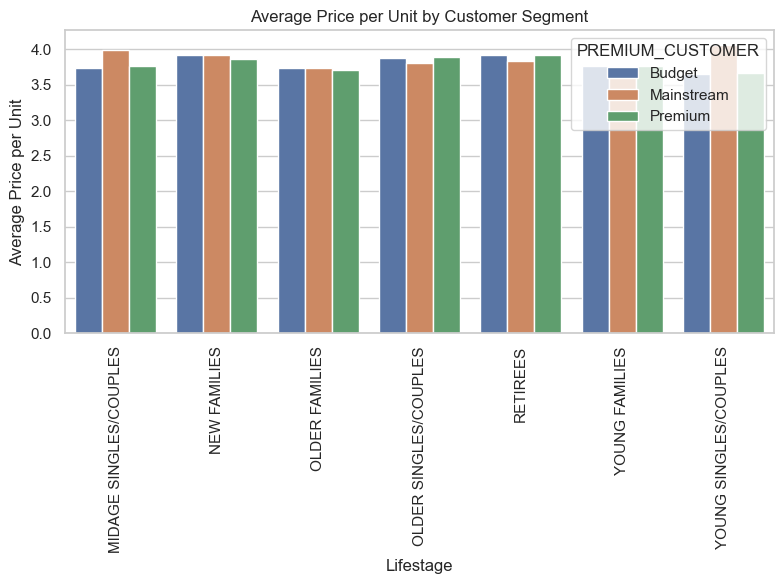

In [71]:
# Calculate the average price per unit
data['Price_per_Unit'] = data['TOT_SALES'] / data['PROD_QTY']

# Group by LIFESTAGE and PREMIUM_CUSTOMER and calculate the average price per unit
avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    avg_price_per_unit=('Price_per_Unit', 'mean')
).reset_index()

# Plotting the average price per unit
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_per_unit, x='LIFESTAGE', y='avg_price_per_unit', hue='PREMIUM_CUSTOMER', dodge=True)
plt.xlabel('Lifestage')
plt.ylabel('Average Price per Unit')
plt.title('Average Price per Unit by Customer Segment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [72]:
import scipy.stats as stats

In [73]:
# Calculate the price per unit
data['Price_per_Unit'] = data['TOT_SALES'] / data['PROD_QTY']

# Filter the data for the relevant customer segments
mainstream = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream')]
premium = data[(data['PREMIUM_CUSTOMER'] == 'Premium')]

budget_midage = data[(data['LIFESTAGE'] == 'Budget - Midage')]
young_singles_couples = data[(data['LIFESTAGE'] == 'Young Singles/Couples')]

# Perform t-tests
t_test_mainstream_premium = stats.ttest_ind(mainstream['Price_per_Unit'], premium['Price_per_Unit'], nan_policy='omit')
t_test_budget_midage_young = stats.ttest_ind(budget_midage['Price_per_Unit'], young_singles_couples['Price_per_Unit'], nan_policy='omit')

# Output the results
print("T-test results for Mainstream vs Premium:")
print(f"t-statistic: {t_test_mainstream_premium.statistic}, p-value: {t_test_mainstream_premium.pvalue}")

print("\nT-test results for Budget - Midage vs Young Singles/Couples:")
print(f"t-statistic: {t_test_budget_midage_young.statistic}, p-value: {t_test_budget_midage_young.pvalue}")

T-test results for Mainstream vs Premium:
t-statistic: 11.096115580393358, p-value: 1.3420572458727282e-28

T-test results for Budget - Midage vs Young Singles/Couples:
t-statistic: nan, p-value: nan


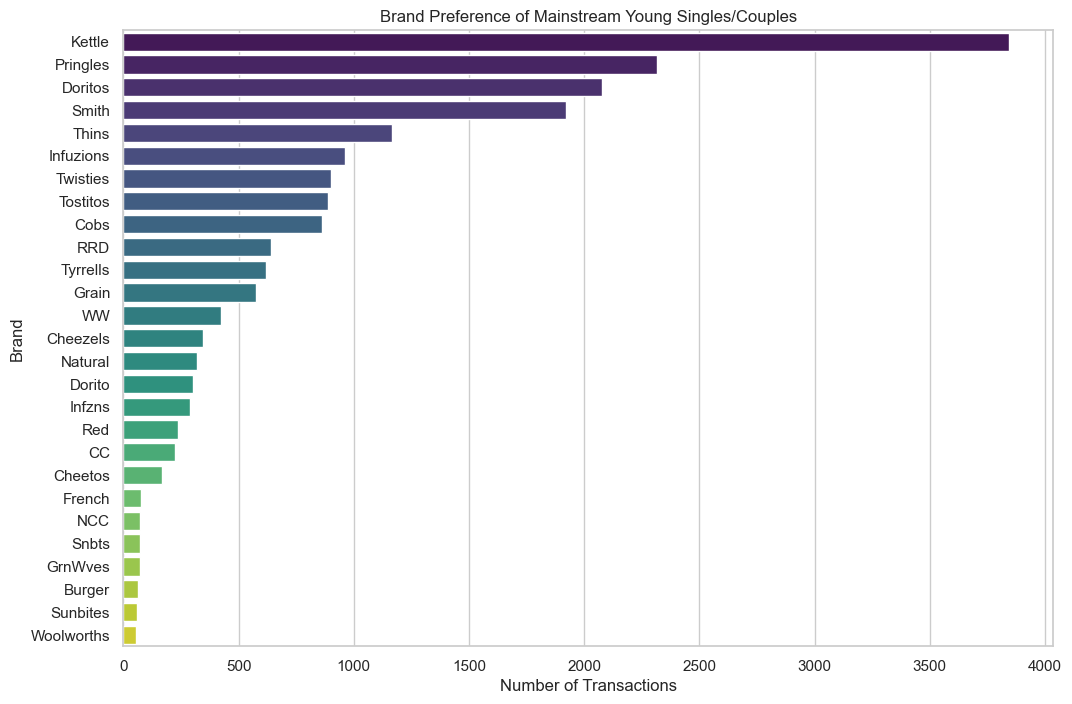

In [74]:
# Filter data for Mainstream young singles/couples
mainstream_young_singles_couples = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
                                        (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Count the number of transactions per brand for this segment
brand_preference = mainstream_young_singles_couples['BRAND'].value_counts().reset_index()
brand_preference.columns = ['BRAND', 'Transaction_Count']

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(data=brand_preference, x='Transaction_Count', y='BRAND', palette='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Brand')
plt.title('Brand Preference of Mainstream Young Singles/Couples')
plt.show()

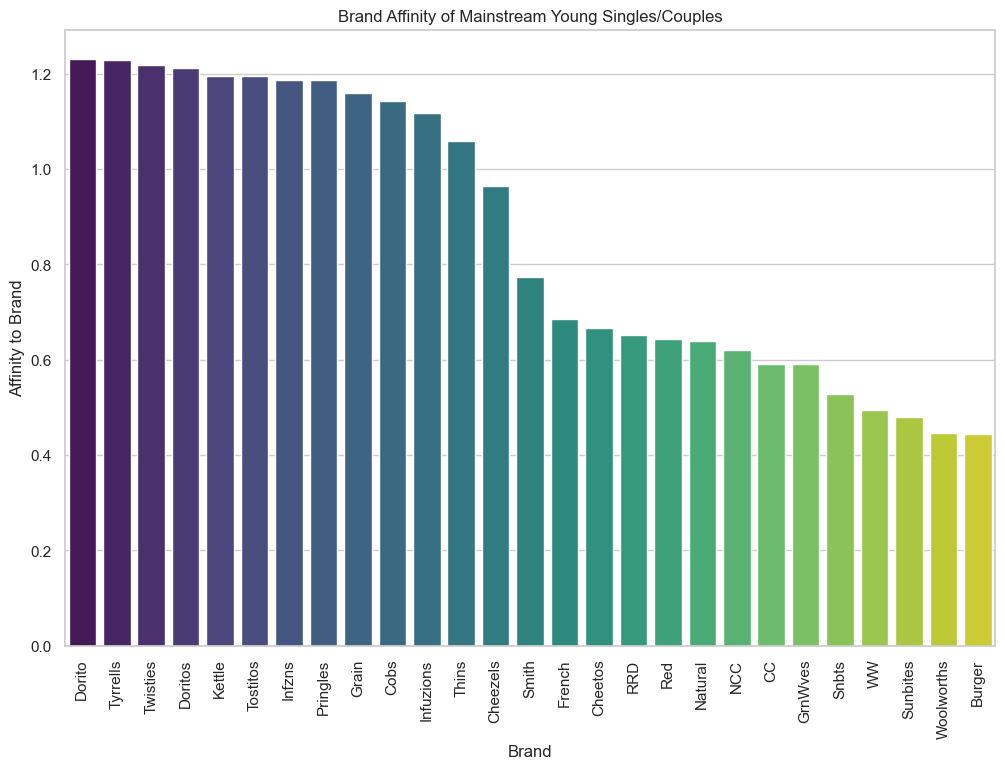

In [75]:
# Filter data for Mainstream young singles/couples
segment1 = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Calculate total quantity of products bought by the segment and the rest
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Calculate brand proportions for the segment and the rest
quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1

quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other

# Merge the proportions and calculate affinity to brand
brand_proportions = pd.merge(quantity_segment1_by_brand[['BRAND', 'targetSegment']], quantity_other_by_brand[['BRAND', 'other']], on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Sort by affinity to brand
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

# Plot the brand affinity
plt.figure(figsize=(12, 8))
sns.barplot(data=brand_proportions, x='BRAND', y='affinityToBrand', palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Affinity to Brand')
plt.title('Brand Affinity of Mainstream Young Singles/Couples')
plt.xticks(rotation=90)
plt.show()

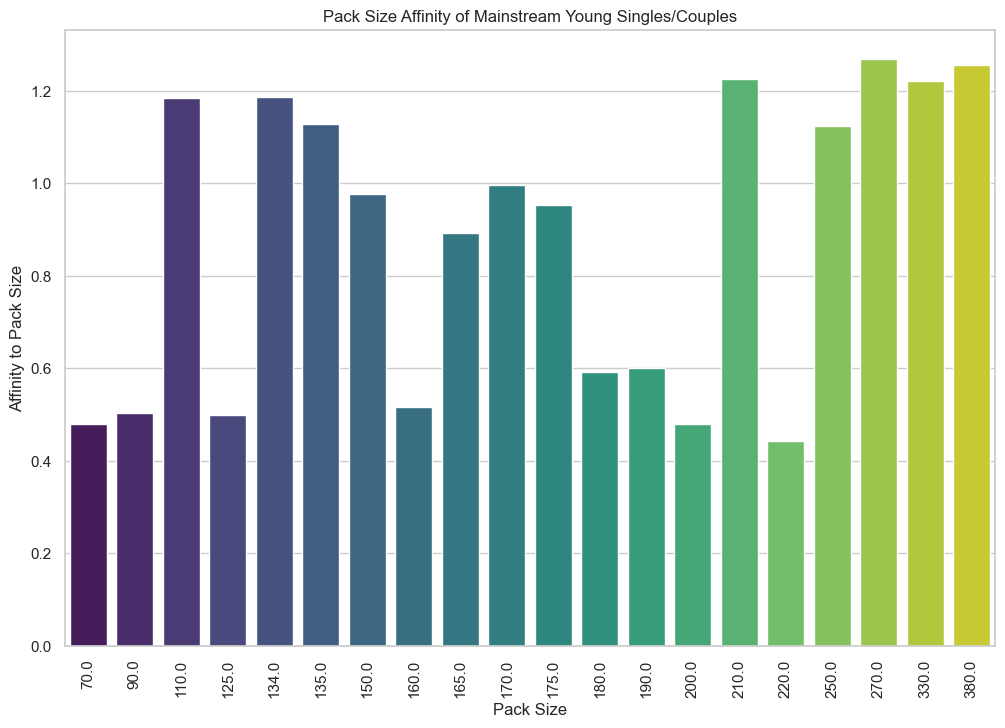

In [76]:
# Calculate pack size proportions for the segment and the rest
quantity_segment1_by_pack_size = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_pack_size['targetSegment'] = quantity_segment1_by_pack_size['PROD_QTY'] / quantity_segment1

quantity_other_by_pack_size = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack_size['other'] = quantity_other_by_pack_size['PROD_QTY'] / quantity_other

# Merge the proportions and calculate affinity to pack size
pack_size_proportions = pd.merge(quantity_segment1_by_pack_size[['PACK_SIZE', 'targetSegment']], quantity_other_by_pack_size[['PACK_SIZE', 'other']], on='PACK_SIZE')
pack_size_proportions['affinityToPackSize'] = pack_size_proportions['targetSegment'] / pack_size_proportions['other']

# Sort by affinity to pack size
pack_size_proportions = pack_size_proportions.sort_values(by='affinityToPackSize', ascending=False)

# Plot the pack size affinity
plt.figure(figsize=(12, 8))
sns.barplot(data=pack_size_proportions, x='PACK_SIZE', y='affinityToPackSize', palette='viridis')
plt.xlabel('Pack Size')
plt.ylabel('Affinity to Pack Size')
plt.title('Pack Size Affinity of Mainstream Young Singles/Couples')
plt.xticks(rotation=90)
plt.show()